In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [2]:
os.chdir('D:/codes/data_sets/ml-100k/')

In [3]:
data = pd.read_csv('u.data',sep='\t',names=['user_id','item_id','rating','timestamp'])

In [4]:
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
data.shape

(100000, 4)

In [6]:
data.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [7]:
item = pd.read_csv('u.item',sep ='\|',encoding="ISO-8859-1",header=None,engine='python')
item.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
item = item[[0,1]]
item.columns = ['item_id','title']
item.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
data = data.drop('timestamp',axis=1)
data.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [10]:
data = data.merge(item,on='item_id')

In [11]:
data.head(-1)

,user_id,item_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)
...,...,...,...,...
99994,916,1682,3,Scream of Stone (Schrei aus Stein) (1991)
99995,840,1674,4,Mamma Roma (1962)
99996,655,1640,3,"Eighth Day, The (1996)"
99997,655,1637,3,Girls Town (1996)


In [12]:
rating = pd.DataFrame(data.groupby('title').mean().rating)
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
count = pd.DataFrame(data.groupby('title').count()['rating']).sort_values('title',ascending=True)
count.columns = ['rating_count']
count.to_csv('count.csv')
count.head()

,rating_count
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


In [14]:
count.shape

(1664, 1)

In [15]:
rating=rating.merge(count,on='title')
rating.shape

(1664, 2)

In [16]:
rating.describe()

,rating,rating_count
count,1664.000000,1664.000000
mean,3.077018,60.096154
std,0.780418,80.956484
min,1.000000,1.000000
25%,2.665094,7.000000
50%,3.162132,27.000000
75%,3.651808,80.250000
max,5.000000,583.000000


<AxesSubplot:xlabel='rating', ylabel='Count'>

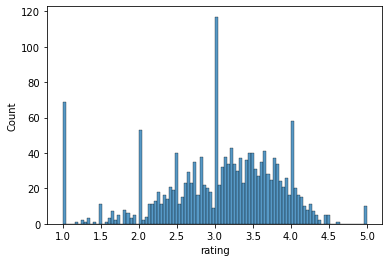

In [17]:
sns.histplot(rating.rating,bins=100)

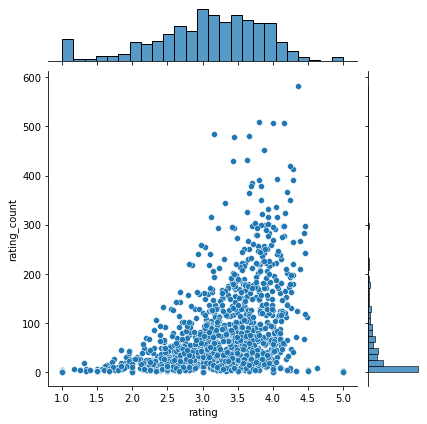

In [18]:
sns.jointplot(x=rating.rating,y=rating.rating_count)

In [19]:
moviemat = data.pivot_table(columns='title',index='user_id',values='rating')
moviemat.to_csv('moviemat.csv')

In [20]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [21]:
starwars_user_ratings = moviemat['Star Wars (1977)'].dropna()
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
4    5.0
5    4.0
6    4.0
Name: Star Wars (1977), dtype: float64

In [22]:
warnings.filterwarnings(action='ignore', category=RuntimeWarning)

In [23]:
starwars_corr = pd.DataFrame(moviemat.corrwith(starwars_user_ratings),columns=['correlation'])

In [24]:
starwars_corr.head(10)

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [25]:
starwars_corr.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [26]:
starwars_corr = starwars_corr.merge(rating['rating_count'],on='title')
starwars_corr = starwars_corr.reset_index()
starwars_corr.head()

,title,correlation,rating_count
0,'Til There Was You (1997),0.872872,9
1,1-900 (1994),-0.645497,5
2,101 Dalmatians (1996),0.211132,109
3,12 Angry Men (1957),0.184289,125
4,187 (1997),0.027398,41


In [63]:
starwars_corr = starwars_corr[starwars_corr['rating_count']>100].reset_index().drop('index',axis=1)
starwars_corr

,title,correlation,rating_count
0,101 Dalmatians (1996),0.211132,109
1,12 Angry Men (1957),0.184289,125
2,2001: A Space Odyssey (1968),0.230884,259
3,Absolute Power (1997),0.085440,127
4,"Abyss, The (1989)",0.203709,151
...,...,...,...
329,Willy Wonka and the Chocolate Factory (1971),0.221902,326
330,"Wizard of Oz, The (1939)",0.266335,246
331,"Wrong Trousers, The (1993)",0.216204,118
332,Young Frankenstein (1974),0.192589,200


In [33]:
movie_type=pd.read_csv('movie_genre.csv')
movie_type

,title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998).1,You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,unknown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Action,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Adventure,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Animation,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Children's,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Comedy,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,Crime,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Documentary,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Drama,0,0,0,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,1
9,Fantasy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
starwars_genre = movie_type['Star Wars (1977)'].dropna()
starwars_genre

0     0
1     1
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    0
17    1
18    0
Name: Star Wars (1977), dtype: int64

In [46]:
sr = movie_type.corrwith(starwars_genre)
sr

Toy Story (1995)                            -0.258775
GoldenEye (1995)                             0.396788
Four Rooms (1995)                           -0.140859
Get Shorty (1995)                            0.069007
Copycat (1995)                              -0.258775
                                               ...   
Mat' i syn (1997)                           -0.140859
B. Monkey (1998)                             0.184482
Sliding Doors (1998).1                       0.184482
You So Crazy (1994)                         -0.140859
Scream of Stone (Schrei aus Stein) (1991)   -0.140859
Length: 1682, dtype: float64

In [64]:
starwars_genre_corr = pd.DataFrame(sr).reset_index()
starwars_genre_corr.columns=['title','genre_correlation']
starwars_genre_corr.sort_values('genre_correlation',ascending=False).head(10)

,title,genre_correlation
49,Star Wars (1977),1.000000
180,Return of the Jedi (1983),1.000000
171,"Empire Strikes Back, The (1980)",0.879664
270,Starship Troopers (1997),0.864099
497,"African Queen, The (1951)",0.864099
120,Independence Day (ID4) (1996),0.724569
240,"Last of the Mohicans, The (1992)",0.724569
227,Star Trek: The Wrath of Khan (1982),0.724569
61,Stargate (1994),0.724569
1238,Cutthroat Island (1995),0.724569


In [65]:
starwars_genre_corr.merge(starwars_corr,on='title').sort_values(['correlation','genre_correlation'],ascending=False).head(10)

,title,genre_correlation,correlation,rating_count
22,Star Wars (1977),1.000000,1.000000,583
93,"Empire Strikes Back, The (1980)",0.879664,0.747981,367
102,Return of the Jedi (1983),1.000000,0.672556,507
95,Raiders of the Lost Ark (1981),0.573944,0.536117,420
159,Austin Powers: International Man of Mystery (1...,-0.140859,0.377433,130
114,"Sting, The (1973)",-0.204980,0.367538,241
127,Indiana Jones and the Last Crusade (1989),0.573944,0.350107,331
229,Pinocchio (1940),-0.204980,0.347868,101
65,"Frighteners, The (1996)",-0.204980,0.332729,115
193,L.A. Confidential (1997),-0.308607,0.319065,297


In [107]:
def prediction():
    moviename = input('Enter Movie Name:')
    print("Mode 1 to RATING based prediction\nMode 2 to GENRE based prediction\nMode 3 to both GENRE and RATING based Prediction" )
    x = int(input('Select the mode to predict:'))
    if(x==1):
        movie_user_ratings = moviemat[moviename].dropna()
        movie_corr = pd.DataFrame(moviemat.corrwith(movie_user_ratings),columns=['Rating_correlation']).dropna()
        movie_corr = movie_corr.merge(rating['rating_count'],on='title')
        related_movie = movie_corr[movie_corr['rating_count']>100].sort_values('Rating_correlation',ascending=False).head(10)
        return related_movie
    elif(x==2):
        movie_genre = movie_type[moviename].dropna()
        movie_genre_corr = pd.DataFrame(movie_type.corrwith(movie_genre),columns=['Genre_correlation']).dropna()
        return movie_genre_corr.sort_values('Genre_correlation',ascending=False).head(10)
    elif(x==3):
        #rating prediction
        movie_user_ratings = moviemat[moviename].dropna()
        movie_corr = pd.DataFrame(moviemat.corrwith(movie_user_ratings),columns=['Rating_correlation']).dropna()
        movie_corr = movie_corr.merge(rating['rating_count'],on='title')
        movie_corr = movie_corr.reset_index()
        movie_corr = movie_corr[movie_corr['rating_count']>100].reset_index().drop('index',axis=1)
        #genre prediction slight change since we have to merge both the table 
        movie_genre = movie_type[moviename].dropna()
        series = movie_type.corrwith(movie_genre)
        movie_genre_corr = pd.DataFrame(series).reset_index()
        movie_genre_corr.columns=['title','Genre_correlation']
        related_movie = movie_genre_corr.merge(movie_corr,on='title').sort_values(['Rating_correlation','Genre_correlation'],ascending=False)
        related_movie = related_movie[related_movie['Genre_correlation']>0].head(10).reset_index().drop('index',axis=1)
        return related_movie
    else: return print('Select Correct Mode')

In [108]:
prediction()

Enter Movie Name:Room with a View, A (1986)
Mode 1 to RATING based prediction
Mode 2 to GENRE based prediction
Mode 3 to both GENRE and RATING based Prediction
Select the mode to predict:1


,Rating_correlation,rating_count
title,,
"Room with a View, A (1986)",1.000000,134
Star Trek: The Motion Picture (1979),0.610742,117
"Sex, Lies, and Videotape (1989)",0.512420,101
Sense and Sensibility (1995),0.507766,268
"Hunchback of Notre Dame, The (1996)",0.477240,127
Real Genius (1985),0.475900,119
My Left Foot (1989),0.472575,121
Cinema Paradiso (1988),0.441418,121
Little Women (1994),0.441408,102


In [109]:
prediction()

Enter Movie Name:Room with a View, A (1986)
Mode 1 to RATING based prediction
Mode 2 to GENRE based prediction
Mode 3 to both GENRE and RATING based Prediction
Select the mode to predict:2


,Genre_correlation
Bliss (1997),1.0
"Pillow Book, The (1995)",1.0
Home for the Holidays (1995),1.0
"Bridges of Madison County, The (1995)",1.0
Farewell My Concubine (1993),1.0
Picture Bride (1995),1.0
Phenomenon (1996),1.0
Circle of Friends (1995),1.0
Immortal Beloved (1994),1.0
Moonlight and Valentino (1995),1.0


In [110]:
prediction()

Enter Movie Name:Room with a View, A (1986)
Mode 1 to RATING based prediction
Mode 2 to GENRE based prediction
Mode 3 to both GENRE and RATING based Prediction
Select the mode to predict:3


,title,Genre_correlation,Rating_correlation,rating_count
0,"Room with a View, A (1986)",1.000000,1.000000,134
1,"Sex, Lies, and Videotape (1989)",0.687184,0.512420,101
2,Sense and Sensibility (1995),1.000000,0.507766,268
3,My Left Foot (1989),0.687184,0.472575,121
4,Cinema Paradiso (1988),0.792118,0.441418,121
5,Little Women (1994),0.687184,0.441408,102
6,Annie Hall (1977),0.441176,0.427291,180
7,Benny & Joon (1993),0.441176,0.423398,102
8,What's Eating Gilbert Grape (1993),0.441176,0.422556,115
9,Ulee's Gold (1997),0.687184,0.422196,184
